## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [318]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [412]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",
                   sep=",")

In [152]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [153]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [7]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [14]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

##### Данными 2 способами кажется, что пропусков нет, но если заглянуть ниже, где устанавливаются типы признаков через unique(), то замечаем, что в некоторых столбцах есть такие значения как 'unknown/no savings account', 'unknown / no property', 'female : non-single or male : single', значит пропуски все же имеются.

In [48]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [509]:
data.apply(lambda x: print(x.unique()))

['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
[18 9 12 10 8 6 24 11 30 48 36 15 42 21 27 33 28 4 47 14 39 60 5 22 54 13
 16 7 20 26 45 72 40]
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
[1049 2799 841 2122 2171 2241 3398 1361 1098 3758 3905 6187 1957 7582 1936
 2647 3939 3213 2337 7228 3676 3124 2384 1424 4716 4771 652 1154 3556 4796
 3017 3535 6614 1376 1721 860 1495 1934 3378 3868 996 1755 1028 2825 1239
 1216 1258 1864 1474 1382 640 3919 1224 2331 6313 385 1655 1053 3160 3079
 1163 2679 3578 10875 1344 1237 3077 2284 1567 2032 2745 1867 2299 929
 3399 2030 3275 1940 1602 1979 2022 3342 5866 2360 1520 3651 2346 4454 666

status                     None
duration                   None
credit_history             None
purpose                    None
amount                     None
savings                    None
employment_duration        None
installment_rate           None
personal_status_sex        None
other_debtors              None
present_residence          None
property                   None
age                        None
other_installment_plans    None
housing                    None
number_credits             None
job                        None
people_liable              None
telephone                  None
foreign_worker             None
credit_risk                None
dtype: object

##### По уникальным значениям каждого столбца понимаем каким типом данных является признак

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [155]:
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

##### Процент клиентов моложе 30 лет, которые снимают жилье

In [156]:
len(data[(data["age"] < 30) & (data["housing"] == "rent")])/len(data[data["age"] < 30]) * 100

66.66666666666666

##### Процент клиентов старше 40 лет, которые снимают жилье

In [157]:
len(data[(data["age"] > 40) & (data["housing"] == "rent")])/len(data[data["age"] > 40]) * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [133]:
import numpy as np

In [164]:
len(data[(data["foreign_worker"] == "yes") & ((data["number_credits"] == "4-5") | (data["number_credits"] == ">= 6"))])

1

### Задание 6 (1 балл)

In [320]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

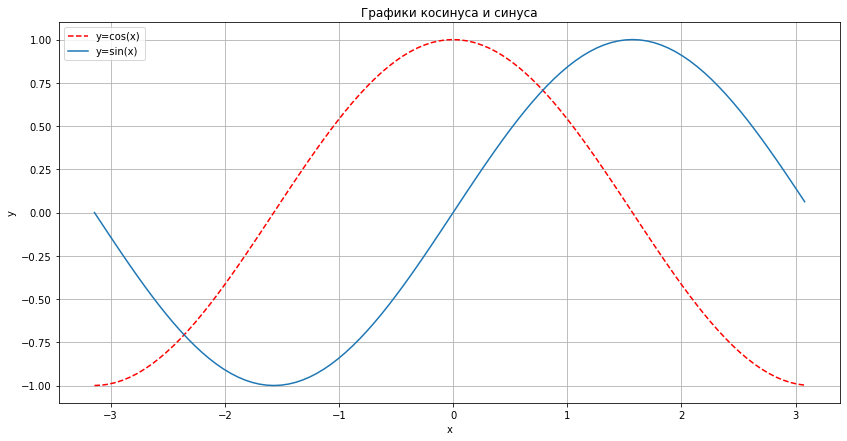

In [346]:
xlist = np.arange(-np.pi, np.pi, 2 * np.pi / 100)

cos_list = [np.cos(x) for x in xlist]
sin_list = [np.sin(x) for x in xlist]
plt.grid(True)
plt.plot(xlist, cos_list, 'r--', xlist, sin_list)
plt.legend(['y=cos(x)','y=sin(x)'], loc=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графики косинуса и синуса")
plt.show()

##### Построили обычные графики косинуса и синуса исключительно с помощью matplotlib

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

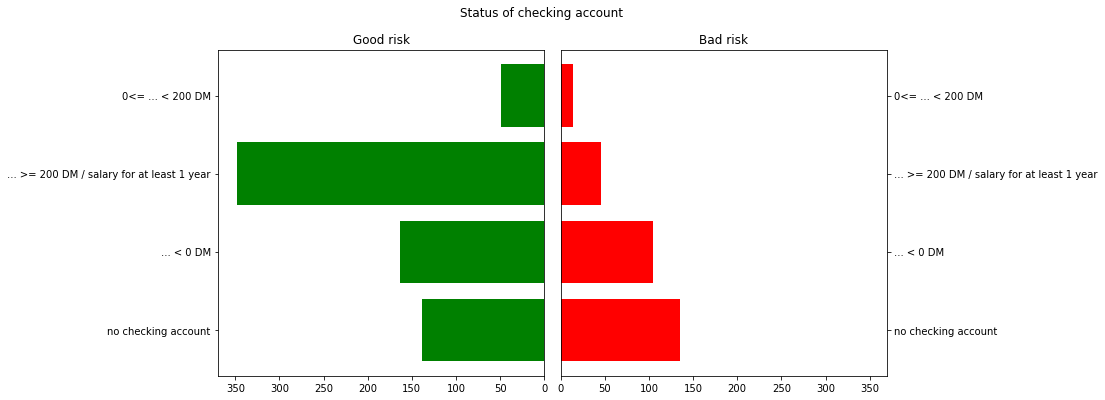

In [348]:
fig, ax = plt.subplots(ncols=2)
arr1 = []
arr2 = []
first = data[data['credit_risk'] == 'good']['status']
second = data[data['credit_risk'] == 'bad']['status']
my_list = data['status'].unique()
for tmp in my_list:
    arr1.append(first.value_counts()[tmp])
    arr2.append(second.value_counts()[tmp])
ax[0].barh(my_list, arr1, color="green")
ax[0].set_xlim([0, 370])
ax[0].set_title("Good risk")
ax[0].invert_xaxis()


ax[1].barh(my_list, arr2, color="red")
ax[1].set_xlim([0, 370])
ax[1].set_title("Bad risk")
plt.tick_params(axis='y', left=False, right=True, labelright=True, labelleft=False)
fig.suptitle('Status of checking account')
fig.set_figwidth(12)    
fig.set_figheight(6)    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

##### Очевидная зависимость: чем больше размер текущего счета, тем меньше отрицательных кейсов и больше положительных

### Задание 8  (0.5 балла)

In [350]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

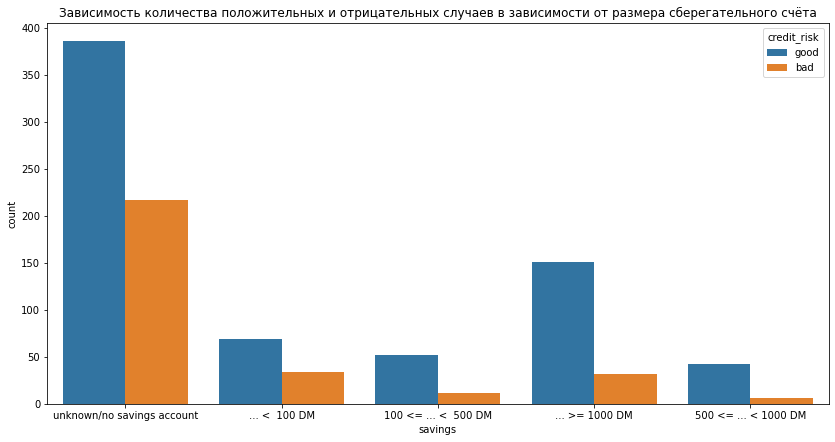

In [347]:
sns.countplot(x="savings", hue="credit_risk", data=data)
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Зависимость количества положительных и отрицательных случаев в зависимости от размера сберегательного счёта")
plt.show()

##### Как можно заметить, чем больше размер сберегательного счета, тем меньше процент отрицательных случаев и больше положительных (то есть при unknown и < 100 DM отношение положительных случаев к отрицательным равна 2:1, а при >= 1000 DM примерно 5:1)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

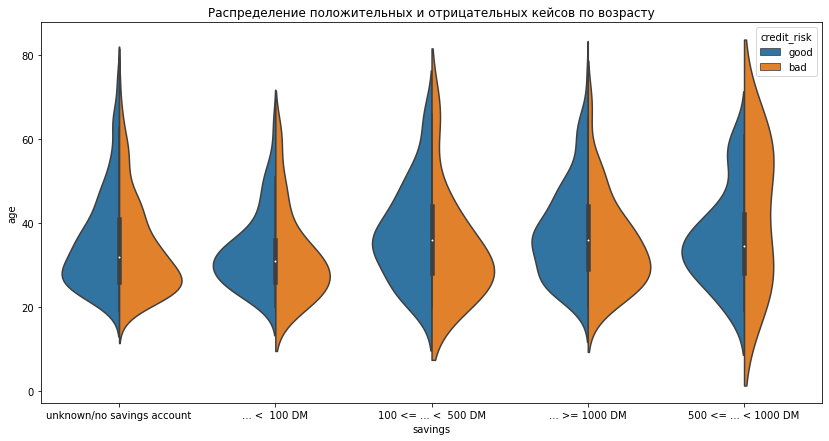

In [349]:
sns.violinplot(x="savings", y = "age", hue="credit_risk", split=True, data=data)
plt.rcParams['figure.figsize'] = [14, 7]
plt.title("Распределение положительных и отрицательных кейсов по возрасту")
plt.show()

##### Заметим, что большинство положительных и отрицательных случаев фиксируется у людей в возрасте до 40 лет, но есть исключение в виде группы, относящейся к savings со значениями 500 <= ... <= 1000 DM, где отрицательнные случаи вытянуты на протяжении 20-70 лет, здесь нет определенного пика по отрицательным случаям

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

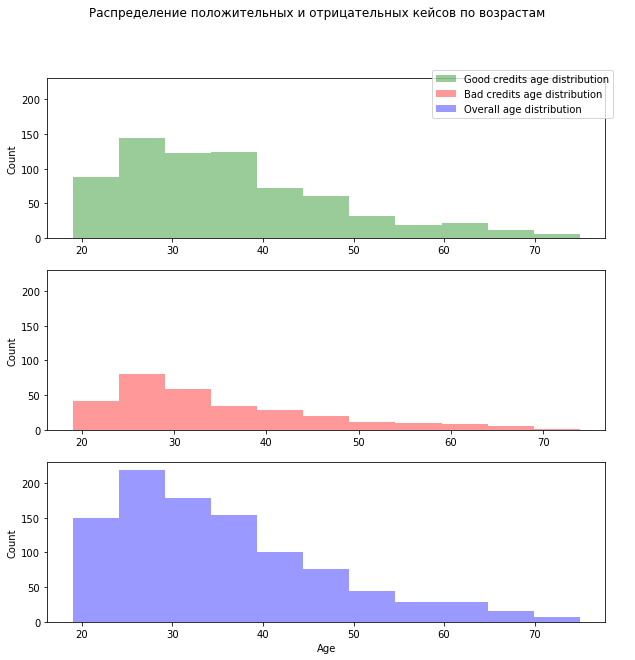

In [394]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax1 = sns.distplot(data[data["credit_risk"] == "good"]['age'], kde=False, bins=11, color="green", label="Good credits age distribution")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 230)

ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.distplot(data[data["credit_risk"] == "bad"]['age'], kde=False, bins=11, color="red", label="Bad credits age distribution")
plt.xlabel("")
plt.ylabel("Count")
plt.ylim(0, 230)

ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.distplot(data['age'], kde=False, bins=11, color="blue", label="Overall age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.ylim(0, 230)

lines=[]
labels=[]

for ax in fig.axes:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)

plt.suptitle("Распределение положительных и отрицательных кейсов по возрастам")
fig.legend(lines, labels, loc=(0.68, 0.82))
plt.show()


##### Можно заметить, что распределение положительных и отрицательных кейсов примерно одинаково по возрастам, везде большинство кейсов лежит в пределе от 20 до 50 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

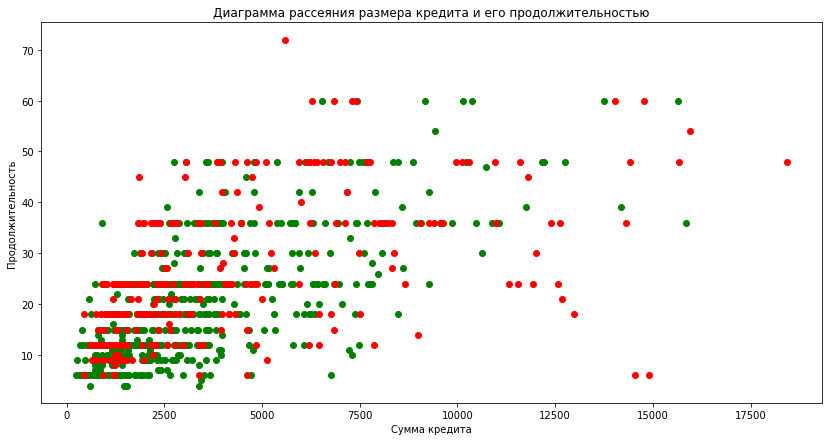

In [466]:
plt.scatter(data[data["credit_risk"] == "good"]["amount"], data[data["credit_risk"] == "good"]["duration"], c="green")
plt.scatter(data[data["credit_risk"] == "bad"]["amount"], data[data["credit_risk"] == "bad"]["duration"],c="red")
plt.xlabel("Сумма кредита")
plt.ylabel("Продолжительность")
plt.title("Диаграмма рассеяния размера кредита и его продолжительностью")
plt.show()

##### По диаграмме рассения можно сделать вывод, что люди с положительными кейсами берут кредины меньшей суммы, чем люди с отрицательными (если например мысленно провести вертикальную линию через 10 000, то заметим что справа красных точек больше, чем зеленых). Но как видно, общий тренд для всех пользователей банка это меньшая сумма кредита на меньший срок

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

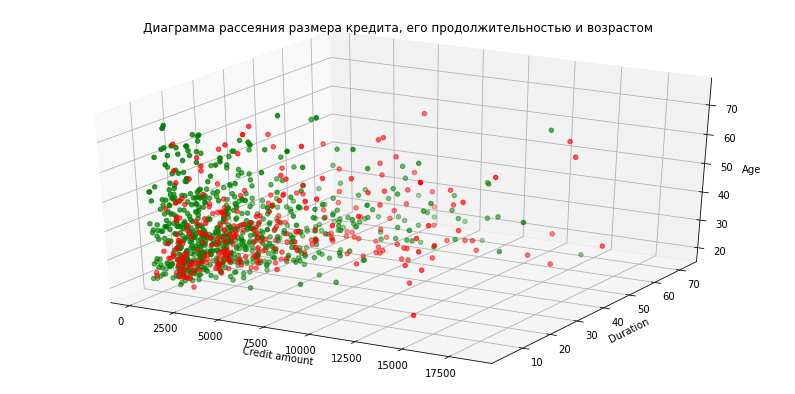

In [480]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x1 = data[data["credit_risk"] == "good"]["amount"]
y1 = data[data["credit_risk"] == "good"]["duration"]
z1 = data[data["credit_risk"] == "good"]["age"]

x2 = data[data["credit_risk"] == "bad"]["amount"]
y2 = data[data["credit_risk"] == "bad"]["duration"]
z2 = data[data["credit_risk"] == "bad"]["age"]

ax.scatter(x1, y1, z1, c="green")
ax.scatter(x2, y2, z2, c="red")
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
plt.title("Диаграмма рассеяния размера кредита, его продолжительностью и возрастом")
plt.show()

##### Выводы примерно те же, что и в предыдущем задании, но тут еще добавляется то, что чем выше возраст, тем выше процент положительных кейсов

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [406]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
label = LabelEncoder()

In [413]:
def change_status(x):
    if x == "no checking account":
        return 0
    elif x == "... < 0 DM":
        return 1
    elif x == "0<= ... < 200 DM":
        return 2
    elif x == "... >= 200 DM / salary for at least 1 year":
        return 3

    
def change_credit_history(x):
    if x == "critical account/other credits elsewhere":
        return 0
    elif x == "delay in paying off in the past":
        return 1
    elif x == "existing credits paid back duly till now":
        return 2
    elif x == "no credits taken/all credits paid back duly":
        return 3
    elif x == "all credits at this bank paid back duly":
        return 4
     
    
def change_savings(x):
    if x == 'unknown/no savings account':
        return 0
    elif x == '... <  100 DM':
        return 1
    elif x == '100 <= ... <  500 DM':
        return 2
    elif x == '500 <= ... < 1000 DM':
        return 3
    elif x == '... >= 1000 DM':
        return 4
    
    
def change_employment(x):
    if x == 'unemployed':
        return 0
    elif x == '< 1 yr':
        return 1
    elif x == '1 <= ... < 4 yrs':
        return 2
    elif x == '4 <= ... < 7 yrs':
        return 3
    elif x == '>= 7 yrs':
        return 4


def change_installment(x):
    if x == '< 20':
        return 0
    elif x == '20 <= ... < 25':
        return 1
    elif x == '25 <= ... < 35':
        return 2
    elif x == '>= 35':
        return 3

    
def change_debtors(x):
    if x == "co-applicant":
        return 0
    elif x == "none":
        return 1
    elif x == "guarantor":
        return 2
    
    
def change_residence(x):
    if x == '< 1 yr':
        return 0
    elif x == '1 <= ... < 4 yrs':
        return 1
    elif x == '4 <= ... < 7 yrs':
        return 2
    elif x == '>= 7 yrs':
        return 3
    

def change_credits(x):
    if x == '1':
        return 0
    elif x == '2-3':
        return 1
    elif x == '4-5':
        return 2
    elif x == '>= 6':
        return 3
    

def change_job(x):
    if x == 'unemployed/unskilled - non-resident':
        return 0
    elif x == 'manager/self-empl./highly qualif. employee':
        return 1
    elif x == 'unskilled - resident':
        return 2
    elif x == 'skilled employee/official':
        return 3
    
    
data['status'] = data['status'].apply(lambda x: change_status(x))
data['duration_Bin'] = pd.cut(data['duration'].astype(int), len(data['duration'].unique()))
data['duration'] = label.fit_transform(data['duration_Bin'])
data['credit_history'] = data["credit_history"].apply(lambda x: change_credit_history(x))
data['amount_Bin'] = pd.cut(data['amount'].astype(int), len(data['amount'].unique()))
data['amount'] = label.fit_transform(data['amount_Bin'])
data['savings'] = data['savings'].apply(lambda x: change_savings(x))
data['employment_duration'] = data['employment_duration'].apply(lambda x: change_employment(x))
data['installment_rate'] = data['installment_rate'].apply(lambda x: change_installment(x))
data['other_debtors'] = data['other_debtors'].apply(lambda x: change_debtors(x))
data['present_residence'] = data["present_residence"].apply(lambda x: change_residence(x))
data['age_Bin'] = pd.cut(data['age'].astype(int), len(data['age'].unique()))
data['age'] = label.fit_transform(data['age_Bin'])
data['number_credits'] = data['number_credits'].apply(lambda x: change_credits(x))
data['job'] = data['job'].apply(lambda x: change_job(x))
data['people_liable'] = (data['people_liable'] == '0 to 2').astype(np.int32)
data['telephone'] = (data['telephone'] == 'yes (under customer name)').astype(np.int32)
data['foreign_worker'] = (data['foreign_worker'] == 'yes').astype(np.int32)
data['credit_risk'] = (data['credit_risk'] == 'good').astype(np.int32)
data.drop(['duration_Bin', 'purpose', 'amount_Bin', 'personal_status_sex', 'property', 'age_Bin', 'other_installment_plans', 'housing'], axis='columns', inplace=True)

data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,6,4,35,0,1,0,1,3,1,0,3,1,0,0,1
1,0,2,4,123,0,2,2,1,1,16,1,3,0,0,0,1
2,1,3,3,25,1,3,2,1,3,3,0,2,1,0,0,1
3,0,3,4,89,0,2,1,1,1,18,1,2,0,0,1,1
4,0,3,4,91,0,2,0,1,3,17,1,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,9,3,82,0,2,2,1,3,1,0,2,0,0,0,0
996,0,9,3,98,0,4,0,0,0,24,0,3,1,0,0,0
997,3,8,4,345,4,4,0,1,3,10,0,1,1,1,0,0
998,1,3,3,254,4,0,2,1,0,31,0,1,1,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [414]:
def predict(Xtest: np.array) -> np.array:
    result = np.array([])
    for i in range(len(Xtest)):
        tmp = 7 * Xtest[i][0] + (-2) * Xtest[i][1] + 6 * Xtest[i][2] + 2 * Xtest[i][4] + 1 * Xtest[i][5] + 1 * Xtest[i][7] + 0.5 * Xtest[i][11] + 1 * Xtest[i][14]
        if tmp > border:
            result = np.append(result, 1)
        else: 
            result = np.append(result, 0)
    return result
    
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
pos=np.array([])
neg=np.array([])
for i in range(len(X_train)):
    tmp = 7 * X_train[i][0] + (-2) * X_train[i][1] + 6 * X_train[i][2] + 2 * X_train[i][4] + 1 * X_train[i][5] + 1 * X_train[i][7] + 0.5 * X_train[i][11] + 1 * X_train[i][14]
    if y_train[i] == 1:
        pos = np.append(pos, tmp)
    else:
        neg = np.append(neg, tmp)
border = (np.median(pos) + np.median(neg)) / 2
accuracy_score(y_test, predict(X_test))

0.7